## Übung 3


## Aufgabe 1

a) Öffnen Sie den Natural Earth-Datensatz "ne_10m_admin_0_countries" in geopandas.

b) Erhalten Sie mit einer geeigeneten Abfrage die Schweiz

c) Suche das Land mit der höchsten Bevölkerungszahl im Datensatz. Zeichne das resultierende Land hervorgehoben in eine Weltkarte ein.

In [94]:
from download import download
import geopandas as gpd
import fiona

In [95]:
filename = "../geodata/packages/natural_earth_vector.gpkg" 

gdf = gpd.read_file(
    filename,
    layer="ne_110m_admin_0_countries",
    encoding="utf-8",
)

In [96]:
gdf.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [97]:
ch = gdf.query("NAME == 'Switzerland' ")

<Axes: >

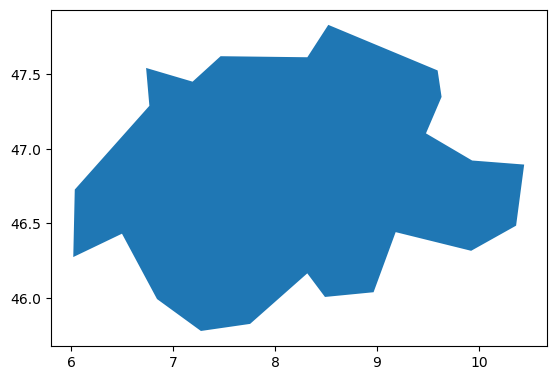

In [98]:
ch.plot()

In [99]:
gdf = gdf[["NAME", "POP_EST", "geometry"]]

gdf_sorted = gdf.sort_values(by="POP_EST", ascending=False)
# gdf_sorted = gdf_sorted["POP_EST"].round(0).astype(int)
gdf_sorted

,NAME,POP_EST,geometry
139,China,1.397715e+09,"MULTIPOLYGON (((109.47521 18.1977, 108.65521 1..."
98,India,1.366418e+09,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
4,United States of America,3.282395e+08,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
8,Indonesia,2.706256e+08,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
102,Pakistan,2.165653e+08,"POLYGON ((77.83745 35.49401, 76.87172 34.65354..."
...,...,...,...
134,New Caledonia,2.878000e+05,"POLYGON ((165.77999 -21.08, 166.59999 -21.7000..."
22,Greenland,5.622500e+04,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
159,Antarctica,4.490000e+03,"MULTIPOLYGON (((-48.66062 -78.04702, -48.1514 ..."
20,Falkland Is.,3.398000e+03,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51..."


In [100]:
name = gdf_sorted.iloc(0)[0].NAME
population = gdf_sorted.iloc(0)[0].POP_EST
print(name, population)

China 1397715000.0


Text(0.5, 1.0, 'China hat am meisten Einwohner')

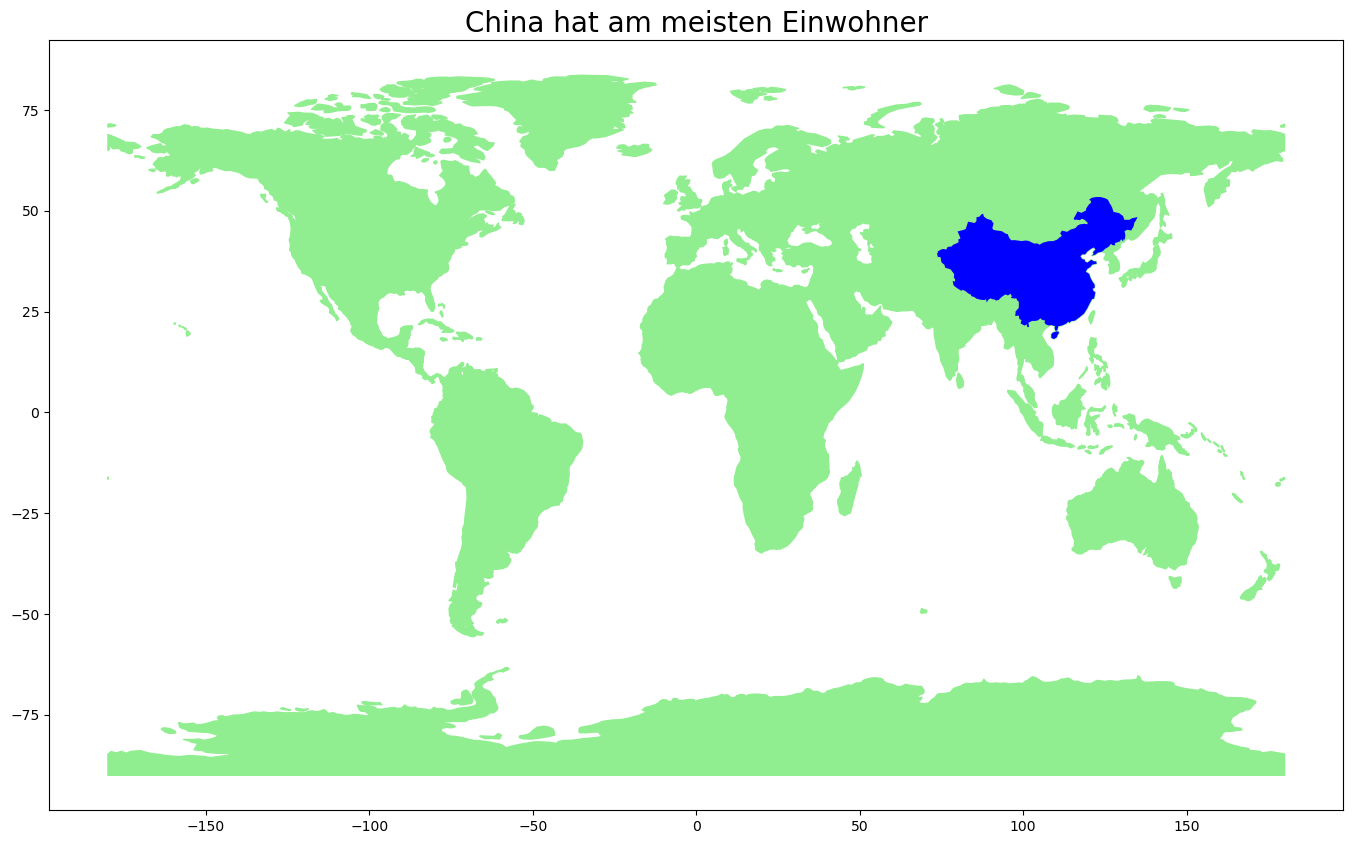

In [103]:
ax = gdf.plot(figsize=(20, 10), facecolor="lightgreen", edgecolor="lightgreen")
gdf.query("NAME == 'China' ").plot(ax=ax, color="blue")

ax.set_title("China hat am meisten Einwohner", fontsize=20)
